**Unemployment Analysis with Python**

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Load the Dataset**

In [ ]:
df = pd.read_csv("/content/Unemployment in India.csv")
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

**Explore the dataset**

* **To print first 5 rows**




In [ ]:
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


 * **To print last 5 rows**

In [ ]:
print(df.tail())

    Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN  


* **To Get Information of Dataset**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


**Data Preprocessing**

* **Check Missing Values**

In [ ]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


* **To Remove Missing values**




In [ ]:
print(df.dropna(inplace=True))


None


* **Check Duplicates**

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.drop_duplicates(inplace=True))

None


**Exploratory Data Analysis (EDA)**

*  **Unemployment Trend Over Time**




In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


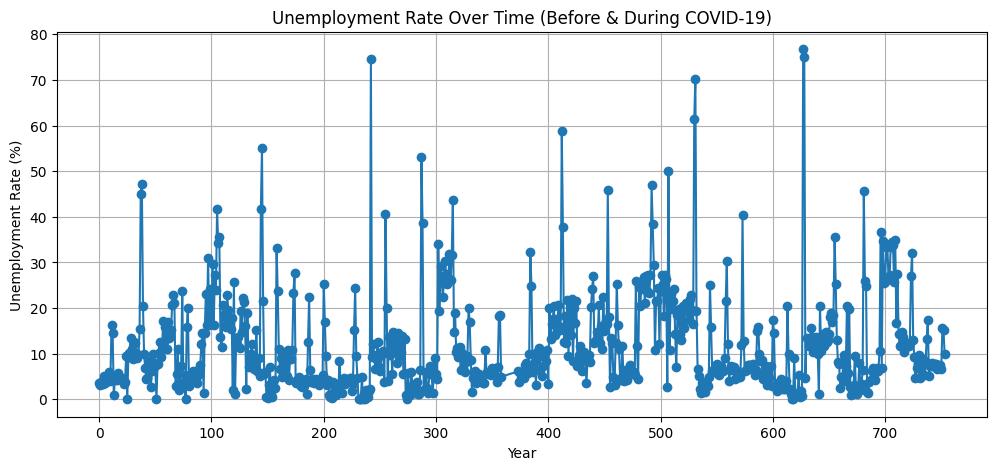

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time (Before & During COVID-19)")
plt.grid()
plt.show()

*  **Unemployment Rate by Region (Bar Chart)**




<ipython-input-38-ce820896a65a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette='coolwarm')


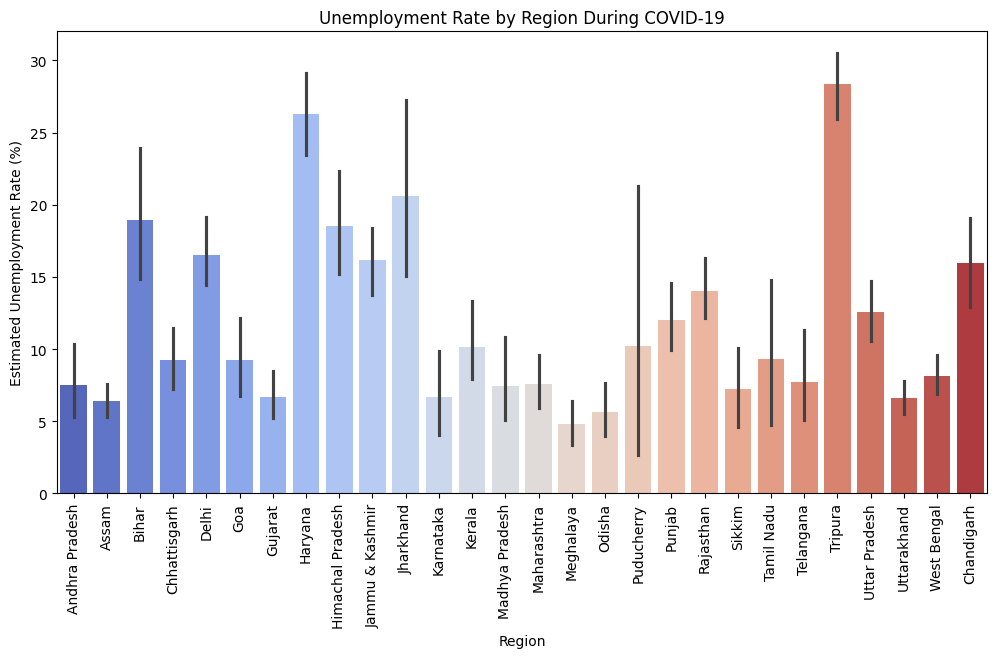

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region During COVID-19")
plt.show()

**Predicting Future Unemployment**

*   **Split the data**




In [ ]:
from sklearn.model_selection import train_test_split
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
X = df[['Year', 'Month', 'Day', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df['Estimated Unemployment Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     Year  Month  Day  Estimated Employed  \
244  2019      6   30           6025235.0   
563  2019      7   31           6266446.0   
537  2019      9   30           8647794.0   
500  2019     10   31            232322.0   
135  2019      7   31           6958404.0   
..    ...    ...  ...                 ...   
71   2019      8   31            183603.0   
106  2020      5   31           3914193.0   
270  2020      6   30          16076978.0   
449  2020      1   31           5647493.0   
102  2020      1   31           5062293.0   

     Estimated Labour Participation Rate (%)  
244                                    45.79  
563                                    37.67  
537                                    39.00  
500                                    49.69  
135                                    39.66  
..                                       ...  
71                                     39.61  
106                                    42.78  
270                                 

In [ ]:
print(X_test)

     Year  Month  Day  Estimated Employed  \
120  2020      5   31           1732050.0   
430  2019      8   31           2392400.0   
334  2019      7   31           2000524.0   
350  2019     10   31          24353018.0   
426  2020      6   30            306505.0   
..    ...    ...  ...                 ...   
69   2019      6   30            170471.0   
382  2020      2   29           4822035.0   
131  2020      5   31           2716966.0   
44   2019      9   30           6490776.0   
70   2019      7   31            167437.0   

     Estimated Labour Participation Rate (%)  
120                                    42.62  
430                                    46.91  
334                                    36.97  
350                                    48.09  
426                                    33.80  
..                                       ...  
69                                     38.19  
382                                    36.84  
131                                 

In [ ]:
print(y_train)

244    12.21
563     7.38
537     3.57
500    23.77
135     9.98
       ...  
71      1.98
106    34.22
270    13.86
449    22.45
102    16.21
Name: Estimated Unemployment Rate (%), Length: 592, dtype: float64


In [ ]:
print(y_test)

120    25.64
430     6.29
334     5.74
350     6.78
426     7.22
       ...  
69      5.45
382     5.66
131     2.22
44      8.33
70     10.98
Name: Estimated Unemployment Rate (%), Length: 148, dtype: float64


**Train the model Using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[17.96916525 11.51531441  9.93256097  6.34294949 16.77223547 11.3443351
 15.58926678 20.30556704  9.70133977 10.82926847 20.16820556 14.36954506
 14.48360916 10.69914015 14.78338897  7.71277434  6.8155998  16.16886794
 12.8897753  11.39088212  9.00322996  7.22952079 11.29796043 13.97666033
  7.32821866 17.96858238 19.45091794 14.3969291  10.79345653 11.6356733
 14.12292601 15.18274948 10.5340669   8.1234856  17.23870194 17.45958811
  7.28629456  9.23834845  8.30752105  6.41174368 11.3597249   8.53781607
  7.43549416  8.28764571  6.11644976 12.44333405 19.46650756 13.99937981
 15.47177768 15.41657549 16.67774738  9.15546023  5.73590328 11.05537588
 10.46972112 10.13426193 12.75563096 15.80663738 12.2289622  13.33340729
 14.87391436 16.12366512 13.5631002  17.69032948  9.16424868  8.92321851
 11.48258983 14.03828449  9.61345708 17.24993121 12.005256    9.0692839
 10.26784077 17.36004649  9.06585254  8.98842549 14.09703795  9.38117752
 12.06350573 13.29737684  8.26046372 11.18297615 -2.82

*  **Evaluate the Model**



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 7.643159634807612
MSE: 123.28544699298689


**Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R-squared: 0.08169451568254893
MSE: 132.95016351351353


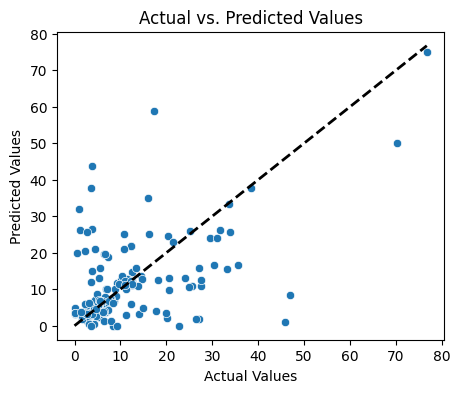

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(5, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

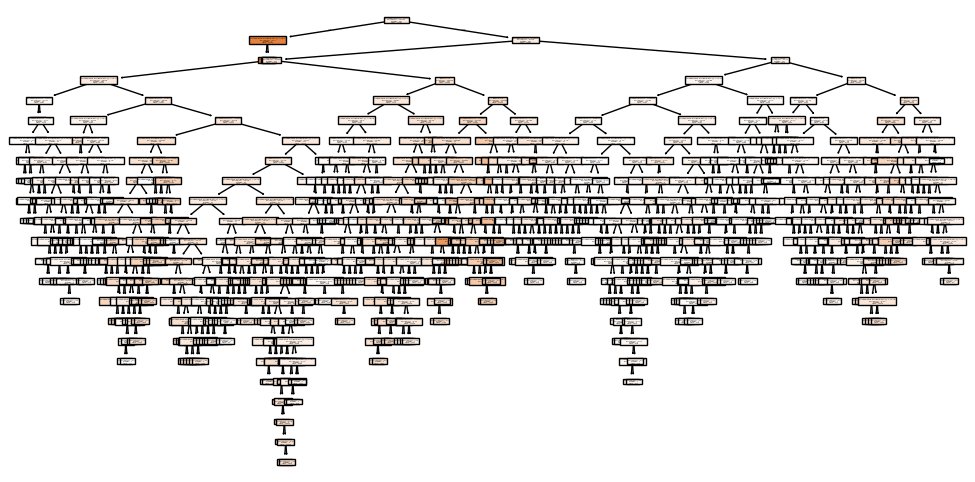

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['Year', 'Month', 'Day', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'], class_names=['Low', 'Moderate', 'High'], filled=True)
plt.show()

In [1]:
!pip install streamlit pyngrok pandas numpy matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.6 MB/s eta 0:00:00


In [11]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# ---------------- PAGE CONFIG ----------------
st.set_page_config(
    page_title="Unemployment Analysis",
    page_icon="📊",
    layout="centered"
)

# ---------------- CSS ----------------
st.markdown("""
<style>
.stApp {
    background: linear-gradient(to right, #e3f2fd, #fce4ec);
}
.main {
    background-color: white;
    padding: 30px;
    border-radius: 15px;
    box-shadow: 0px 8px 20px rgba(0,0,0,0.2);
}
h1, h2, h3 {
    color: #1a237e;
    font-weight: 800;
}
p, label {
    color: #111;
    font-weight: 600;
}
.stButton>button {
    background-color: #1a237e;
    color: white;
    font-weight: 700;
    border-radius: 10px;
    width: 100%;
}
</style>
""", unsafe_allow_html=True)

# ---------------- TITLE ----------------
st.markdown("<h1>📊 Unemployment Analysis in India</h1>", unsafe_allow_html=True)
st.write("Analyze unemployment trends and predict unemployment rate using Machine Learning.")

# ---------------- LOAD DATA ----------------
df = pd.read_csv("Unemployment in India.csv")

# ⭐ IMPORTANT FIX (removes extra spaces in column names)
df.columns = df.columns.str.strip()

# Drop missing values
df.dropna(inplace=True)

# ---------------- DATA PREVIEW ----------------
st.subheader("📄 Dataset Preview")
st.dataframe(df.head())

# ---------------- KEY STATISTICS ----------------
st.subheader("📌 Key Statistics")
avg_rate = df["Estimated Unemployment Rate (%)"].mean()
st.success(f"Average Unemployment Rate: {avg_rate:.2f}%")

# ---------------- TREND PLOT ----------------
st.subheader("📈 Unemployment Trend Over Time")
plt.figure(figsize=(8,4))
plt.plot(df.index, df["Estimated Unemployment Rate (%)"], color="purple")
plt.xlabel("Index")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
st.pyplot(plt)

# ---------------- AREA COMPARISON ----------------
st.subheader("🏙 Unemployment by Area (Rural vs Urban)")
plt.figure(figsize=(6,4))
sns.barplot(
    x="Area",
    y="Estimated Unemployment Rate (%)",
    data=df,
    errorbar=None
)
st.pyplot(plt)

# ---------------- PREDICTION SECTION ----------------
st.subheader("🤖 Predict Unemployment Rate")

# Convert Date
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Features & target
X = df[[

    "Year",
    "Month",
    "Estimated Employed",
    "Estimated Labour Participation Rate (%)"
]]
y = df["Estimated Unemployment Rate (%)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# User inputs

year = st.number_input("Year", 2019, 2025, 2020)
month = st.number_input("Month", 1, 12, 6)
employed = st.number_input("Estimated Employed", 100000, 50000000, 1000000)
labour = st.number_input("Labour Participation Rate (%)", 30.0, 70.0, 45.0)

# Prediction
if st.button("Predict"):
    pred = model.predict([[year, month, employed, labour]])
    pred = max(0, pred[0])  # avoid negative values
    st.success(f"Predicted Unemployment Rate: {pred:.2f}%")

st.markdown("✨ Created using Streamlit & Machine Learning ✨")


Overwriting app.py


In [12]:
!streamlit run app.py &>/content/logs.txt &


In [13]:
from pyngrok import ngrok

ngrok.kill()  # clear old tunnels
ngrok.set_auth_token("33pyU8XWfrN8JFX8kwzY8Uf1j7s_612rotnaQX2f58dq3n8Ez")

public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://nonmultiplicative-iva-stumpy.ngrok-free.dev" -> "http://localhost:8501">